Chapter 4 - Classification/Exercise 42 - Iris Classification Using a CART Decision Tree.ipynb

https://github.com/TrainingByPackt/Applied-Supervised-Learning-with-Python/blob/master/Chapter%204%20-%20Classification/Exercise%2042%20-%20Iris%20Classification%20Using%20a%20CART%20Decision%20Tree.ipynb

### Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

### Load data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Train the model

In [ ]:
#Test data spliting
np.random.seed(10)
samples = np.random.randint(0, len(df), 10)
df_test = df.iloc[samples]
df = df.drop(samples)

In [ ]:
#Fit the CART model
model = DecisionTreeClassifier(max_features=2)
model = model.fit(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)
model.score(df[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df.Species)

1.0

In [ ]:
model.score(df_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], df_test.Species)

1.0

### Visualising the model

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
df.columns[3]

'Petal Width'

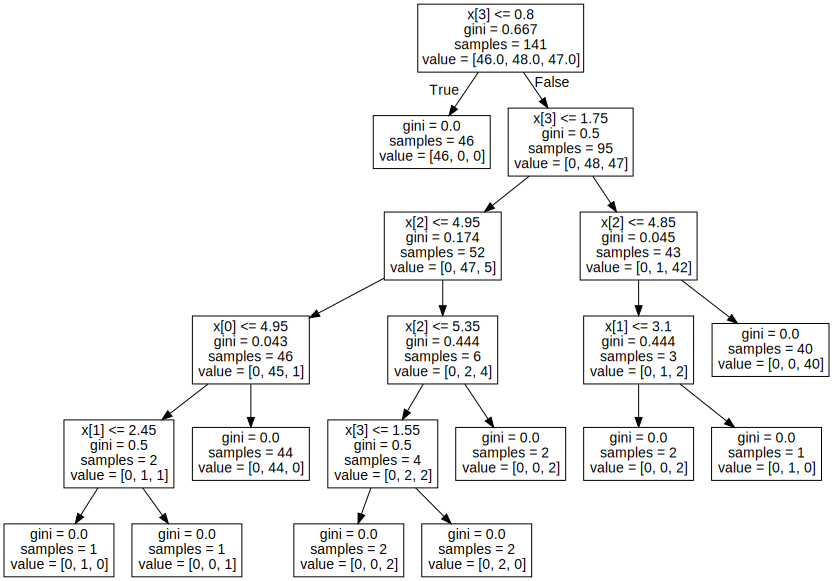

In [ ]:
dot_data = export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph

# **Wheat Seed Dataset Decision Tree**

## **Libralies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

## Data

In [ ]:
from google.colab import drive
drive.mount('/content/GDrive')

Mounted at /content/GDrive


In [ ]:
column = ['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove','Seedtype']
csv_path = '/content/GDrive/MyDrive/COS3302/wheat-seeds.csv'
dfs = pd.read_csv(csv_path,header=None, names=column)

In [ ]:
mapping = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
dfs['Seedtype'] = dfs['Seedtype'].map(mapping)


In [ ]:
dfs.head()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,Seedtype
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_kernel         210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Seedtype                 210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.3+ KB


In [ ]:
dfs.describe()

,Area,Perimeter,Compactness,Length_of_kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


## Visualization

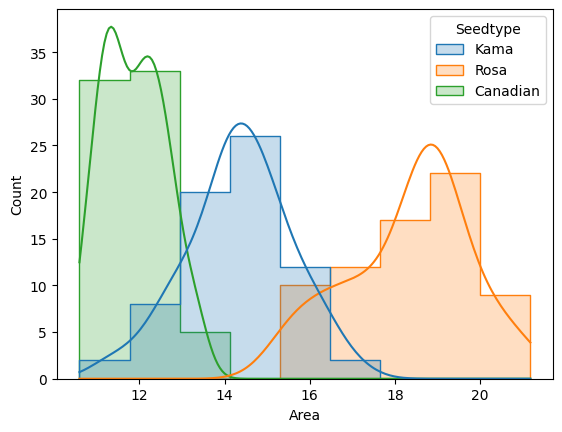

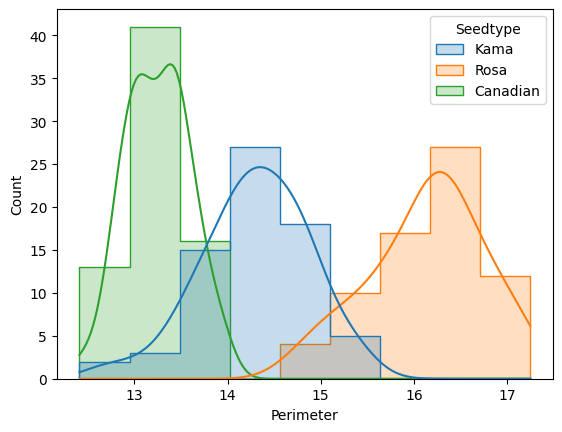

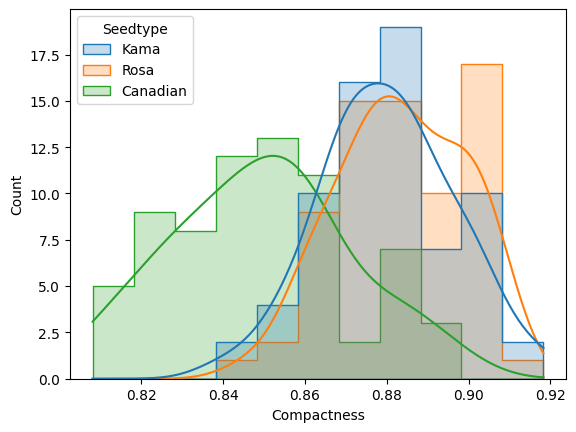

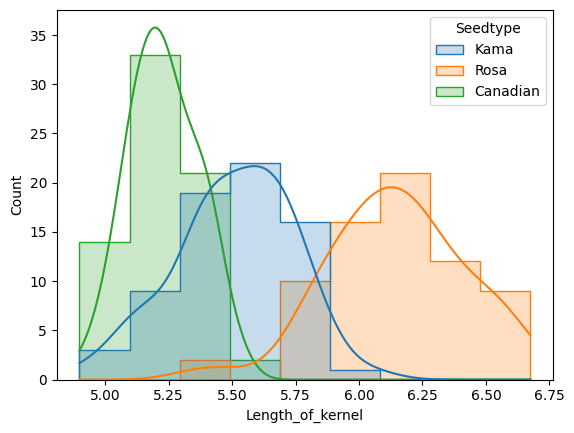

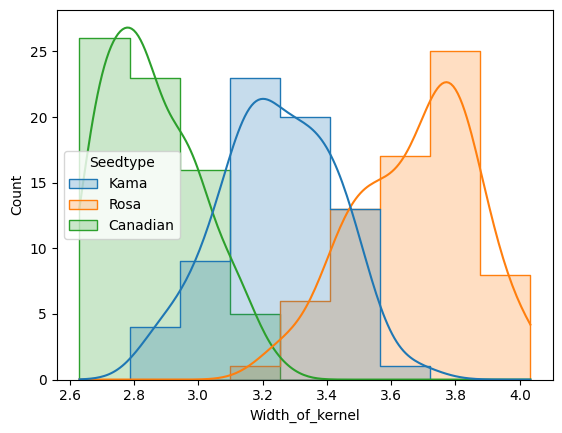

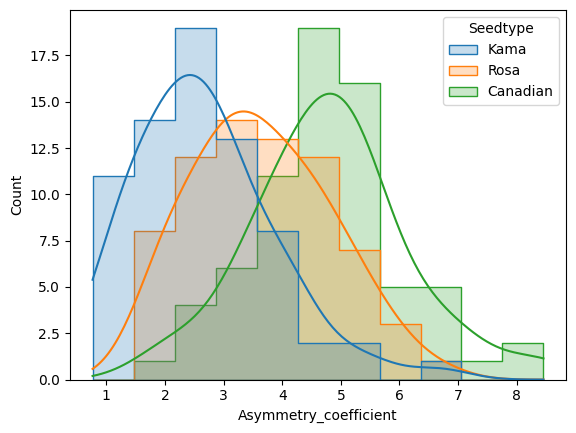

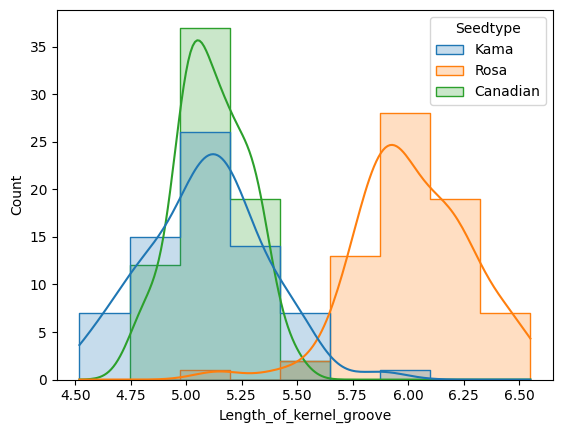

In [ ]:
for col in dfs.columns[:-1]:   # exclude last column
    sns.histplot(data=dfs, x=col, kde=True, hue="Seedtype",element = 'step')
    plt.show()

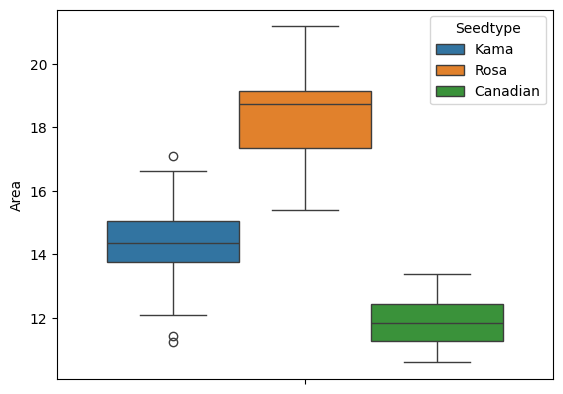

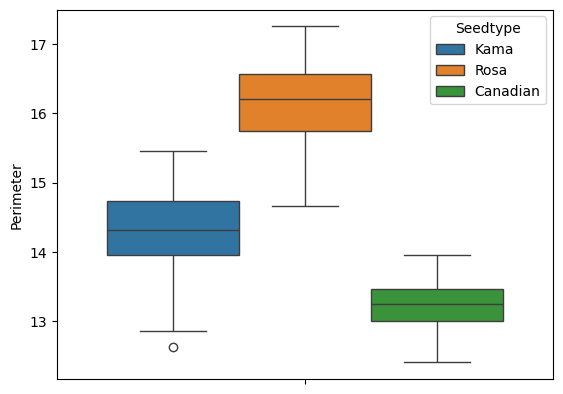

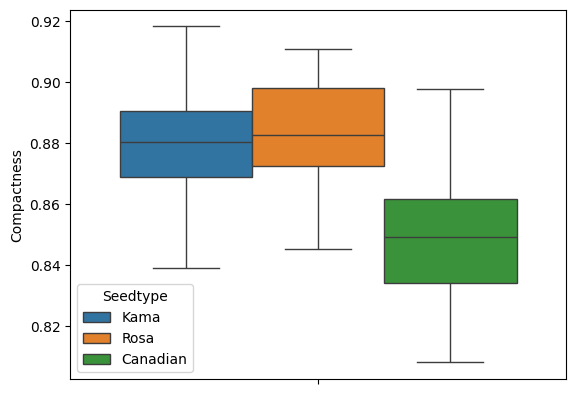

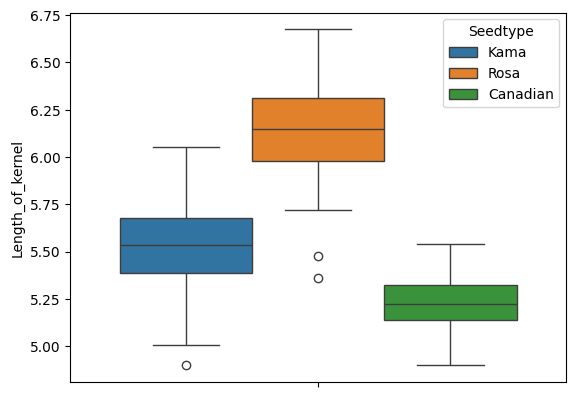

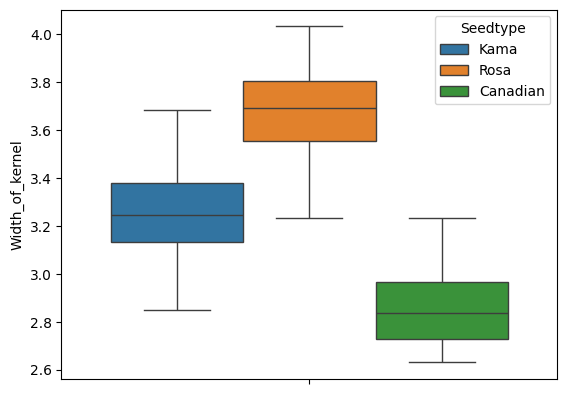

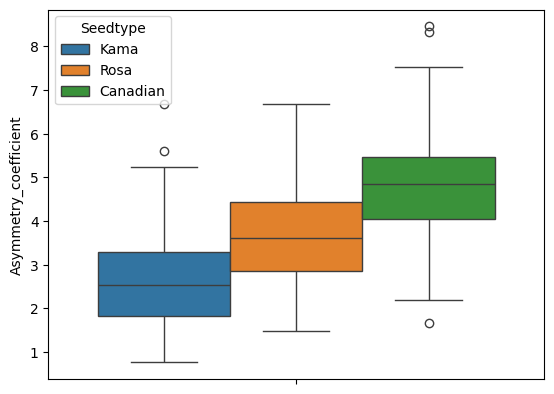

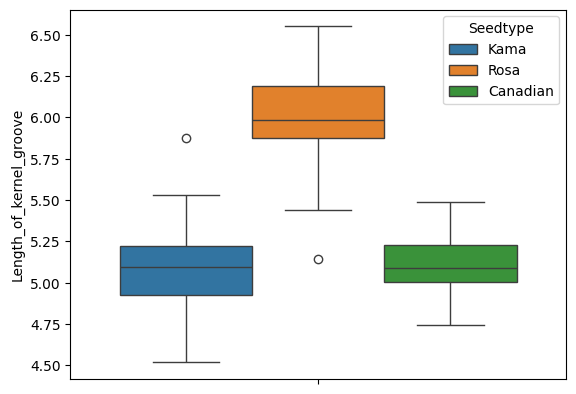

In [ ]:
for col in dfs.columns[:-1]:   # exclude last column
    sns.boxplot(data=dfs, y=col, hue="Seedtype",showfliers = True)
    plt.show()

Text(0.5, 1.05, 'Pearson Correlation of Features')

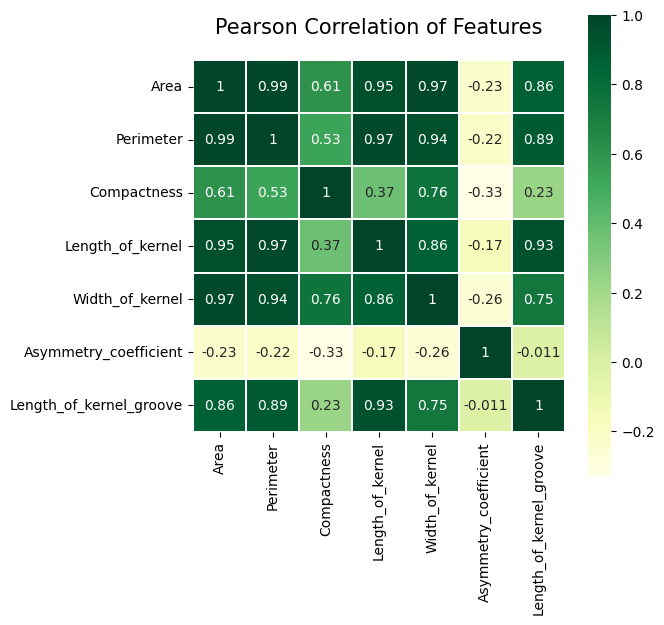

In [ ]:
numerical_data = dfs.select_dtypes(include=np.number) # Select only numerical columns
corr = numerical_data.corr()  # Calculate correlation on numerical data
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

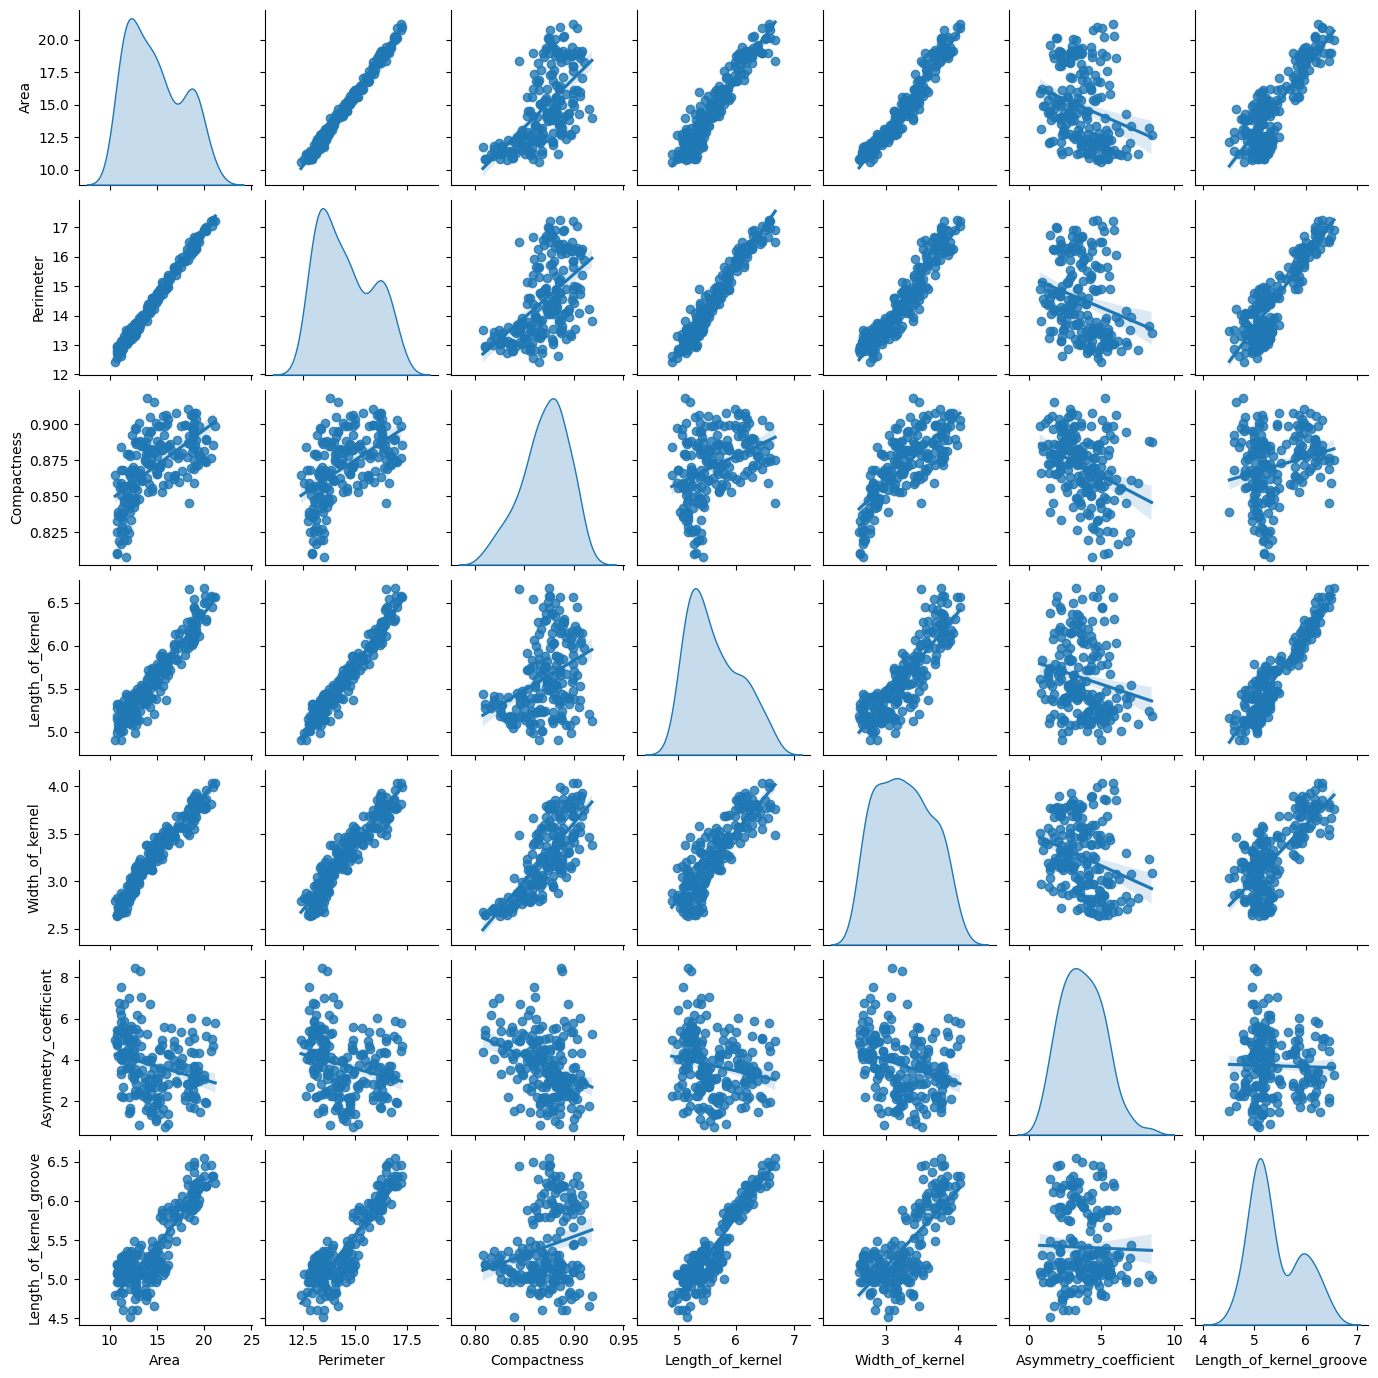

In [ ]:
sns.pairplot(dfs, height=2, diag_kind = 'kde', kind = "reg")

## **Train the model**

In [ ]:
#Test data spliting
np.random.seed(10)
samples = np.random.randint(0, len(dfs), 10)
dfs_test = dfs.iloc[samples]
dfs = dfs.drop(samples)

In [ ]:
#Fit the CART model
model = DecisionTreeClassifier()
model = model.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
model.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)

1.0

In [ ]:
model.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)

0.9

## **Model Visualization**

In [ ]:
dfs.columns[3]

'Length_of_kernel'

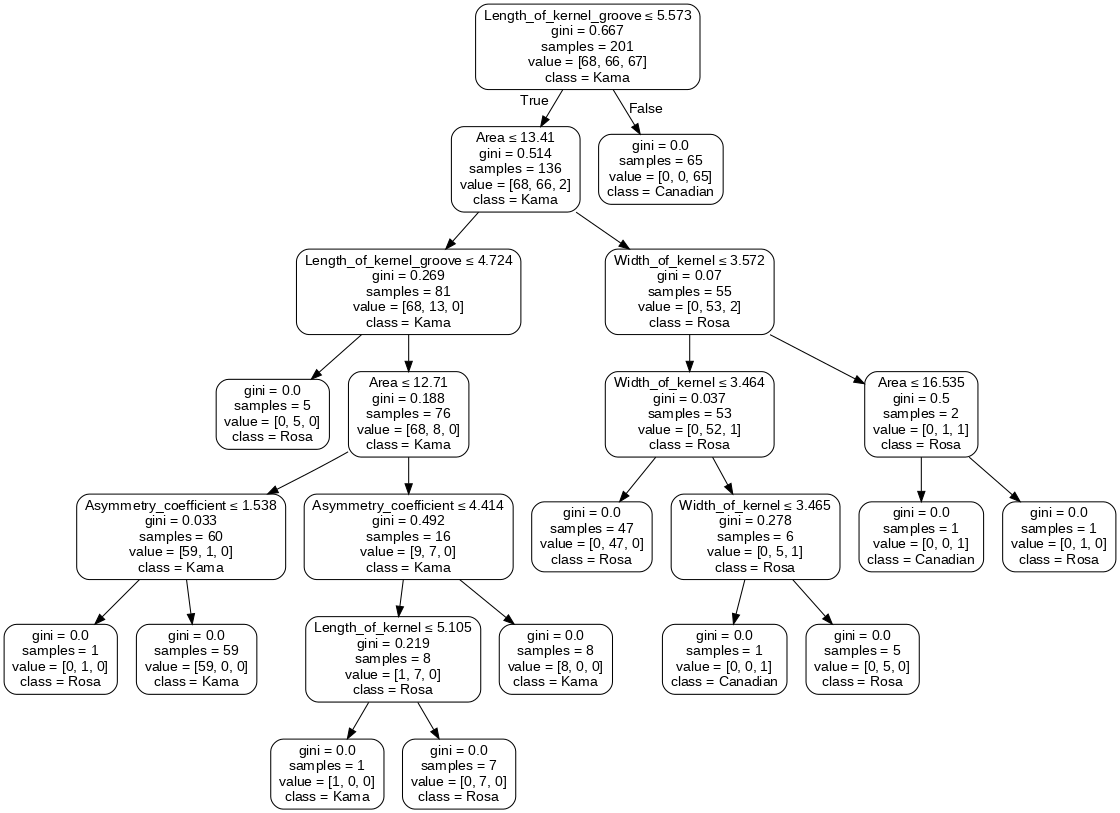

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import subprocess

class_names = ['Kama', 'Rosa', 'Canadian']
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']

# สร้างไฟล์ .dot
export_graphviz(
    model,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    proportion=False,
    impurity=True,
    special_characters=True
)

# ✅ ใช้คำสั่ง graphviz (dot) เพื่อกำหนดขนาดและความละเอียด
# -Tpng = แปลงเป็น png
# -Gsize = กำหนดขนาด
# -Gdpi = ความละเอียด
subprocess.run(["dot", "-Tpng", "-Gsize=14,14!", "-Gdpi=80", "tree.dot", "-o", "tree_small.png"], check=True)

# แสดงภาพใน Colab
Image(filename="tree_small.png")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

def plot_entropy_param(param_name, param_values, dfs_train, dfs_test):
    X_train = dfs_train[['Area','Perimeter','Compactness','Length_of_kernel',
                         'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']]
    y_train = dfs_train['Seedtype']
    X_test = dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
                       'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']]
    y_test = dfs_test['Seedtype']

    train_scores = []
    test_scores = []

    # ✅ ใช้เฉพาะ criterion='entropy'
    for val in param_values:
        model = DecisionTreeClassifier(criterion='entropy', **{param_name: val})
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    # ✅ รวมผลลัพธ์เป็น DataFrame
    df_result = pd.DataFrame({
        param_name: param_values,
        'Train Accuracy': train_scores,
        'Test Accuracy': test_scores
    })

    df_melt = df_result.melt(id_vars=param_name,
                             value_vars=['Train Accuracy','Test Accuracy'],
                             var_name='Type', value_name='Accuracy')

    # ✅ Plot Bar Chart เฉพาะ Entropy
    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=df_melt, x=param_name, y='Accuracy', hue='Type', palette='mako')

    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", label_type="edge", fontsize=9, padding=2)

    plt.title(f'Decision Tree (Entropy) - Effect of {param_name} on Accuracy')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Data Type')
    plt.show()

    print("\n=== Accuracy Table (Entropy only) ===")
    print(df_result.round(4))
    print("=====================================\n")

    return df_result


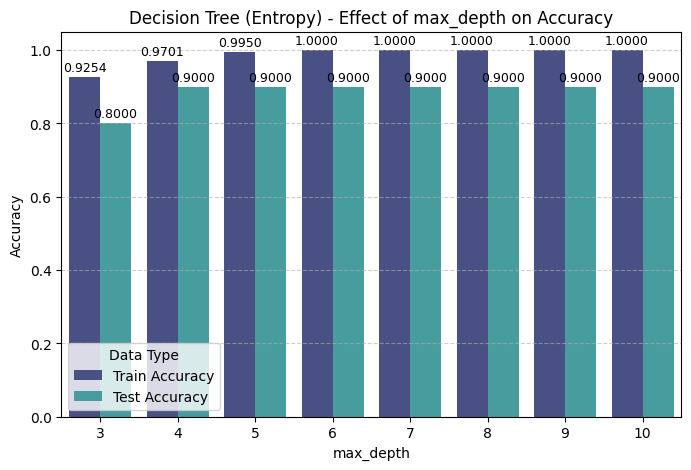


=== Accuracy Table (Entropy only) ===
   max_depth  Train Accuracy  Test Accuracy
0          3          0.9254            0.8
1          4          0.9701            0.9
2          5          0.9950            0.9
3          6          1.0000            0.9
4          7          1.0000            0.9
5          8          1.0000            0.9
6          9          1.0000            0.9
7         10          1.0000            0.9



,max_depth,Train Accuracy,Test Accuracy
0,3,0.925373,0.8
1,4,0.970149,0.9
2,5,0.995025,0.9
3,6,1.000000,0.9
4,7,1.000000,0.9
5,8,1.000000,0.9
6,9,1.000000,0.9
7,10,1.000000,0.9


In [ ]:
plot_entropy_param('max_depth', range(3, 11), dfs, dfs_test)


In [ ]:
for i in range(3,11):
  model_d = DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
  model_d = model_d.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
  train_score = model_d.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
  test_score =model_d.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)

  print(f"Train Score for {i} depth: {train_score}")
  print(f"Test Score for {i} depth: {test_score}")

Train Score for 3 depth: 0.9253731343283582
Test Score for 3 depth: 0.8
Train Score for 4 depth: 0.9701492537313433
Test Score for 4 depth: 0.9
Train Score for 5 depth: 0.9950248756218906
Test Score for 5 depth: 0.9
Train Score for 6 depth: 1.0
Test Score for 6 depth: 0.9
Train Score for 7 depth: 1.0
Test Score for 7 depth: 0.9
Train Score for 8 depth: 1.0
Test Score for 8 depth: 0.9
Train Score for 9 depth: 1.0
Test Score for 9 depth: 0.9
Train Score for 10 depth: 1.0
Test Score for 10 depth: 0.9


In [ ]:
modeld6 = DecisionTreeClassifier(max_depth=4,criterion = 'entropy')
modeld6 = modeld6.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
train_score = modeld6.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
test_score =modeld6.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
            'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)

print(f"Train Score for {i} depth: {train_score}")
print(f"Test Score for {i} depth: {test_score}")

Train Score for 10 depth: 0.9701492537313433
Test Score for 10 depth: 0.9


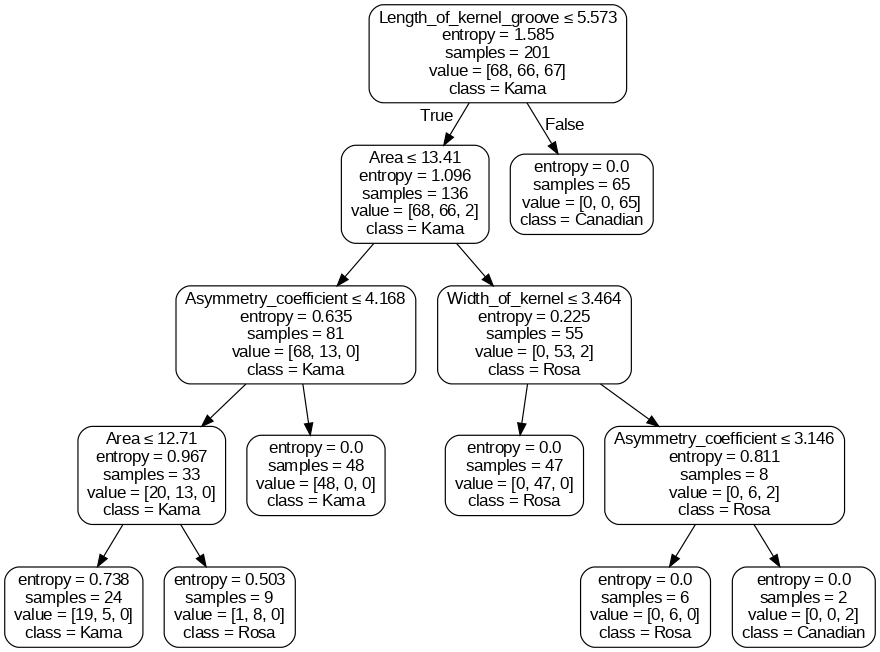

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import subprocess

class_names = ['Kama', 'Rosa', 'Canadian']
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']

# สร้างไฟล์ .dot
export_graphviz(
    modeld6,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    proportion=False,
    impurity=True,
    special_characters=True
)

# ✅ ใช้คำสั่ง graphviz (dot) เพื่อกำหนดขนาดและความละเอียด
# -Tpng = แปลงเป็น png
# -Gsize = กำหนดขนาด
# -Gdpi = ความละเอียด
subprocess.run(["dot", "-Tpng", "-Gsize=11,11!", "-Gdpi=80", "tree.dot", "-o", "tree_small.png"], check=True)

# แสดงภาพใน Colab
Image(filename="tree_small.png")


## **Model(Min Samples Split + Entropy)**

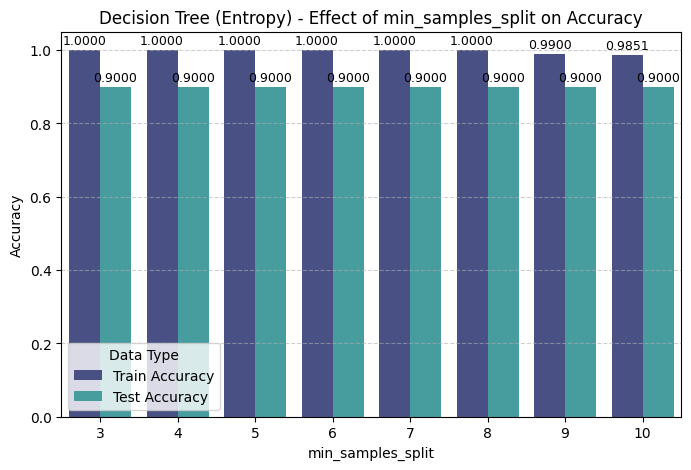


=== Accuracy Table (Entropy only) ===
   min_samples_split  Train Accuracy  Test Accuracy
0                  3          1.0000            0.9
1                  4          1.0000            0.9
2                  5          1.0000            0.9
3                  6          1.0000            0.9
4                  7          1.0000            0.9
5                  8          1.0000            0.9
6                  9          0.9900            0.9
7                 10          0.9851            0.9



,min_samples_split,Train Accuracy,Test Accuracy
0,3,1.000000,0.9
1,4,1.000000,0.9
2,5,1.000000,0.9
3,6,1.000000,0.9
4,7,1.000000,0.9
5,8,1.000000,0.9
6,9,0.990050,0.9
7,10,0.985075,0.9


In [ ]:
plot_entropy_param('min_samples_split', range(3, 11), dfs, dfs_test)

In [ ]:
for i in range(20,31):
    modelmss = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=i)
    modelmss = modelmss.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                  'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
    train_score = modelmss.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                  'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
    test_score =modelmss.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)

    print(f"Train Score for {i}  Min Sample Splits: {train_score}")
    print(f"Test Score for {i} Min Sample splits:{test_score}")

Train Score for 20  Min Sample Splits: 0.9850746268656716
Test Score for 20 Min Sample splits:0.9
Train Score for 21  Min Sample Splits: 0.9800995024875622
Test Score for 21 Min Sample splits:0.9
Train Score for 22  Min Sample Splits: 0.9800995024875622
Test Score for 22 Min Sample splits:0.9
Train Score for 23  Min Sample Splits: 0.9800995024875622
Test Score for 23 Min Sample splits:0.9
Train Score for 24  Min Sample Splits: 0.9800995024875622
Test Score for 24 Min Sample splits:0.9
Train Score for 25  Min Sample Splits: 0.9601990049751243
Test Score for 25 Min Sample splits:0.9
Train Score for 26  Min Sample Splits: 0.9601990049751243
Test Score for 26 Min Sample splits:0.9
Train Score for 27  Min Sample Splits: 0.9601990049751243
Test Score for 27 Min Sample splits:0.9
Train Score for 28  Min Sample Splits: 0.9601990049751243
Test Score for 28 Min Sample splits:0.9
Train Score for 29  Min Sample Splits: 0.9601990049751243
Test Score for 29 Min Sample splits:0.9
Train Score for 30  

In [ ]:
modelmx9 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10)
modelmx9 = modelmx9.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                  'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
train_score = modelmx9.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                  'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
test_score =modelmx9.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)
print(f"Train Score for 9  Min Sample Splits: {train_score}")
print(f"Test Score for 9 Min Sample splits:{test_score}")

Train Score for 9  Min Sample Splits: 0.9850746268656716
Test Score for 9 Min Sample splits:0.9


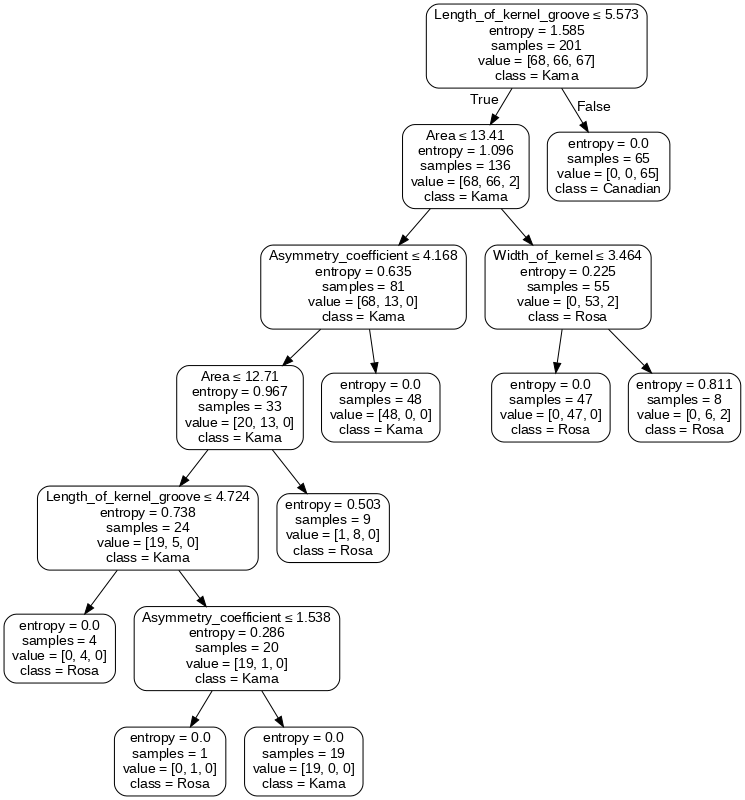

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import subprocess

class_names = ['Kama', 'Rosa', 'Canadian']
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']

# สร้างไฟล์ .dot
export_graphviz(
    modelmx9,
    out_file="tree.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    proportion=False,
    impurity=True,
    special_characters=True
)

# ✅ ใช้คำสั่ง graphviz (dot) เพื่อกำหนดขนาดและความละเอียด
# -Tpng = แปลงเป็น png
# -Gsize = กำหนดขนาด
# -Gdpi = ความละเอียด
subprocess.run(["dot", "-Tpng", "-Gsize=11,10!", "-Gdpi=80", "tree.dot", "-o", "tree_small.png"], check=True)

# แสดงภาพใน Colab
Image(filename="tree_small.png")


## **Model(Max features)**

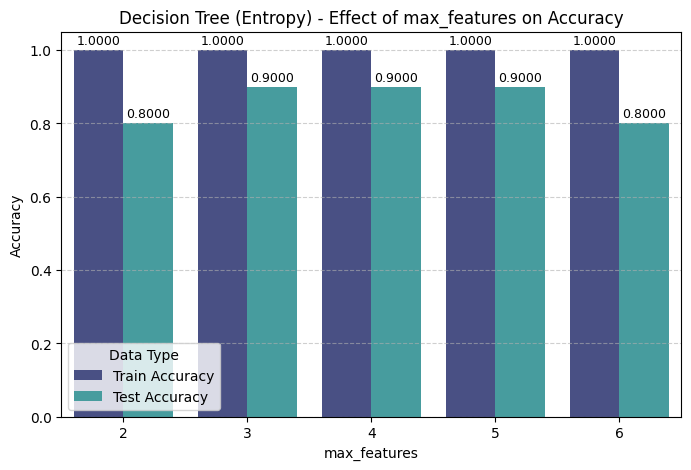


=== Accuracy Table (Entropy only) ===
   max_features  Train Accuracy  Test Accuracy
0             2             1.0            0.8
1             3             1.0            0.9
2             4             1.0            0.9
3             5             1.0            0.9
4             6             1.0            0.8



,max_features,Train Accuracy,Test Accuracy
0,2,1.0,0.8
1,3,1.0,0.9
2,4,1.0,0.9
3,5,1.0,0.9
4,6,1.0,0.8


In [ ]:
plot_entropy_param('max_features', range(2, 7), dfs, dfs_test)


In [ ]:
for j in range(2,7):
  modelmax_f = DecisionTreeClassifier(max_features=j,criterion='entropy')
  modelmax_f = modelmax_f.fit(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
  train_score = modelmax_f.score(dfs[['Area','Perimeter','Compactness','Length_of_kernel',
                'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs.Seedtype)
  test_score =modelmax_f.score(dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']], dfs_test.Seedtype)

  print(f"Train Score for {j} max features: {train_score}")
  print(f"Test Score for {j} max features : {test_score}")

Train Score for 2 max features: 1.0
Test Score for 2 max features : 0.7
Train Score for 3 max features: 1.0
Test Score for 3 max features : 0.9
Train Score for 4 max features: 1.0
Test Score for 4 max features : 0.8
Train Score for 5 max features: 1.0
Test Score for 5 max features : 0.9
Train Score for 6 max features: 1.0
Test Score for 6 max features : 0.9


## **Features Importance**

                   Feature  Importance
6  Length_of_kernel_groove    0.534071
0                     Area    0.371174
5    Asymmetry_coefficient    0.060390
4          Width_of_kernel    0.021304
3         Length_of_kernel    0.013061
2              Compactness    0.000000
1                Perimeter    0.000000


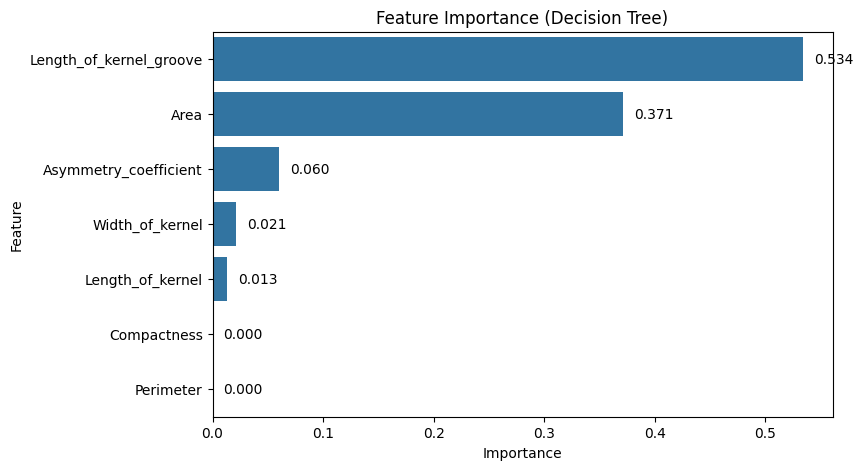

In [ ]:
importances = model.feature_importances_
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']
# รวมเป็น DataFrame
fi = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi = fi.sort_values(by='Importance', ascending=False)
print(fi)

# ====== Plot Bar Graph ======
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# แสดงค่าตัวเลขบนแท่ง
for i, v in enumerate(fi['Importance']):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')
plt.show()

## **Random Forest**

In [ ]:
column = ['Area','Perimeter','Compactness','Length_of_kernel',
              'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove','Seedtype']
csv_path = '/content/GDrive/MyDrive/COS3302/wheat-seeds.csv'
dfz = pd.read_csv(csv_path,header=None, names=column)

In [ ]:
mapping = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
dfz['Seedtype'] = dfz['Seedtype'].map(mapping)


In [ ]:
X = dfz.iloc[:, :-1].values
y = dfz.iloc[:, 7].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

### Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Check accuracy

In [ ]:
rf_model.score(X_test,y_test)

0.8333333333333334

## Change 2 parameters

In [ ]:
model2 = RandomForestClassifier(n_estimators = 600, criterion = 'entropy')
model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=600)

In [ ]:
model2.score(X_test,y_test)

0.9047619047619048

In [ ]:

for i in range (1,11):
  model2 = RandomForestClassifier(n_estimators =i*100, criterion = 'entropy',random_state= 42)
  model2.fit(X_train,y_train)
  print(f'accuracy of {i*100} trees: ',model2.score(X_test,y_test))

accuracy of 100 trees:  0.8333333333333334
accuracy of 200 trees:  0.8571428571428571
accuracy of 300 trees:  0.8809523809523809
accuracy of 400 trees:  0.8809523809523809
accuracy of 500 trees:  0.8809523809523809
accuracy of 600 trees:  0.8809523809523809
accuracy of 700 trees:  0.8809523809523809
accuracy of 800 trees:  0.8809523809523809
accuracy of 900 trees:  0.8809523809523809
accuracy of 1000 trees:  0.8809523809523809


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def plot_param_with_criterion(criterion, param_name, param_values, dfs_train, dfs_test):
    X_train = dfs_train[['Area','Perimeter','Compactness','Length_of_kernel',
                         'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']]
    y_train = dfs_train['Seedtype']
    X_test = dfs_test[['Area','Perimeter','Compactness','Length_of_kernel',
                       'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']]
    y_test = dfs_test['Seedtype']

    train_scores = []
    test_scores = []

    for val in param_values:
        # Changed from DecisionTreeClassifier to RandomForestClassifier
        model = RandomForestClassifier(criterion=criterion, **{param_name: val}, random_state=42)
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    df_result = pd.DataFrame({
        param_name: param_values,
        'Train Accuracy': train_scores,
        'Test Accuracy': test_scores
    })

    df_melt = df_result.melt(id_vars=param_name,
                             value_vars=['Train Accuracy','Test Accuracy'],
                             var_name='Type', value_name='Accuracy')

    plt.figure(figsize=(8,5))
    ax = sns.barplot(data=df_melt, x=param_name, y='Accuracy', hue='Type', palette='mako')

    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", label_type="edge", fontsize=9, padding=2)

    # Updated title to reflect Random Forest
    plt.title(f'Random Forest ({criterion.capitalize()}) - Effect of {param_name} on Accuracy')
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Data Type')
    plt.show()

    print(f"\n=== Accuracy Table ({criterion.capitalize()} only) ===")
    print(df_result.round(4))
    print("=====================================\n")

    return df_result

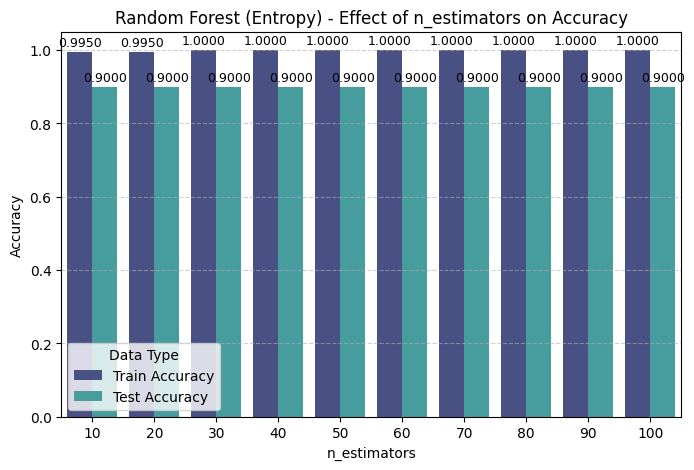


=== Accuracy Table (Entropy only) ===
   n_estimators  Train Accuracy  Test Accuracy
0            10           0.995            0.9
1            20           0.995            0.9
2            30           1.000            0.9
3            40           1.000            0.9
4            50           1.000            0.9
5            60           1.000            0.9
6            70           1.000            0.9
7            80           1.000            0.9
8            90           1.000            0.9
9           100           1.000            0.9



,n_estimators,Train Accuracy,Test Accuracy
0,10,0.995025,0.9
1,20,0.995025,0.9
2,30,1.000000,0.9
3,40,1.000000,0.9
4,50,1.000000,0.9
5,60,1.000000,0.9
6,70,1.000000,0.9
7,80,1.000000,0.9
8,90,1.000000,0.9
9,100,1.000000,0.9


In [ ]:
plot_param_with_criterion('entropy', 'n_estimators', range(10, 110,10), dfs, dfs_test)

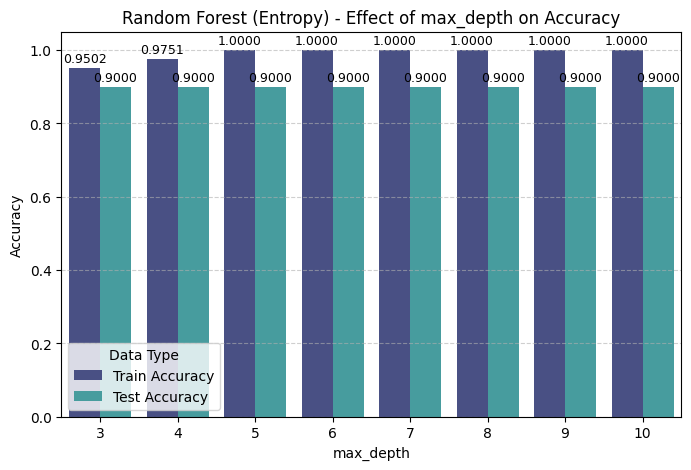


=== Accuracy Table (Entropy only) ===
   max_depth  Train Accuracy  Test Accuracy
0          3          0.9502            0.9
1          4          0.9751            0.9
2          5          1.0000            0.9
3          6          1.0000            0.9
4          7          1.0000            0.9
5          8          1.0000            0.9
6          9          1.0000            0.9
7         10          1.0000            0.9



,max_depth,Train Accuracy,Test Accuracy
0,3,0.950249,0.9
1,4,0.975124,0.9
2,5,1.000000,0.9
3,6,1.000000,0.9
4,7,1.000000,0.9
5,8,1.000000,0.9
6,9,1.000000,0.9
7,10,1.000000,0.9


In [ ]:
plot_param_with_criterion('entropy', 'max_depth', range(3, 11), dfs, dfs_test)

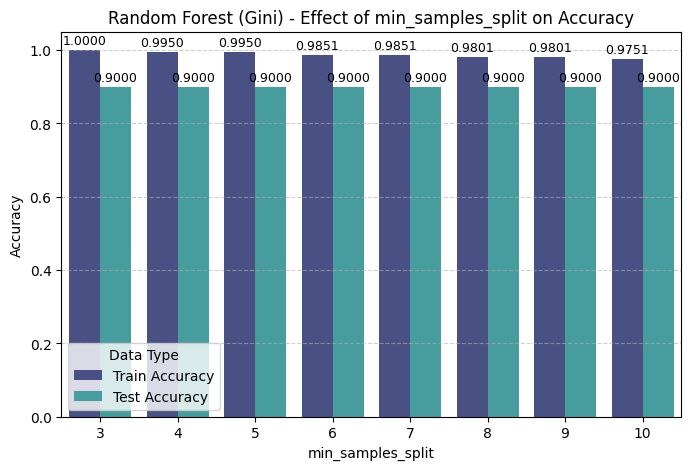


=== Accuracy Table (Gini only) ===
   min_samples_split  Train Accuracy  Test Accuracy
0                  3          1.0000            0.9
1                  4          0.9950            0.9
2                  5          0.9950            0.9
3                  6          0.9851            0.9
4                  7          0.9851            0.9
5                  8          0.9801            0.9
6                  9          0.9801            0.9
7                 10          0.9751            0.9



,min_samples_split,Train Accuracy,Test Accuracy
0,3,1.000000,0.9
1,4,0.995025,0.9
2,5,0.995025,0.9
3,6,0.985075,0.9
4,7,0.985075,0.9
5,8,0.980100,0.9
6,9,0.980100,0.9
7,10,0.975124,0.9


In [ ]:
plot_param_with_criterion('gini','min_samples_split',range(3,11),dfs,dfs_test)

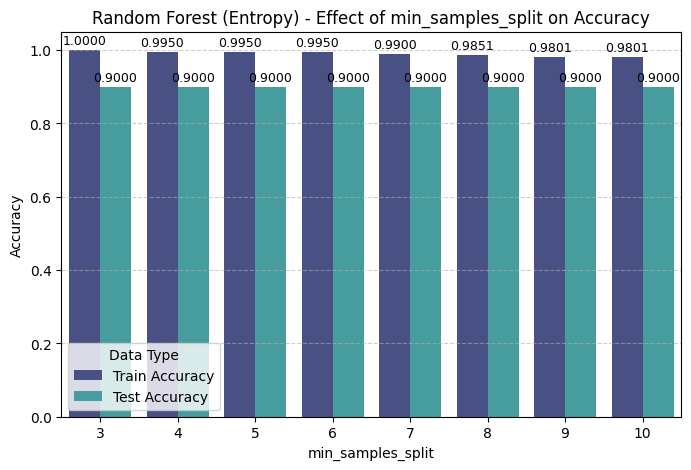


=== Accuracy Table (Entropy only) ===
   min_samples_split  Train Accuracy  Test Accuracy
0                  3          1.0000            0.9
1                  4          0.9950            0.9
2                  5          0.9950            0.9
3                  6          0.9950            0.9
4                  7          0.9900            0.9
5                  8          0.9851            0.9
6                  9          0.9801            0.9
7                 10          0.9801            0.9



,min_samples_split,Train Accuracy,Test Accuracy
0,3,1.000000,0.9
1,4,0.995025,0.9
2,5,0.995025,0.9
3,6,0.995025,0.9
4,7,0.990050,0.9
5,8,0.985075,0.9
6,9,0.980100,0.9
7,10,0.980100,0.9


In [ ]:
plot_param_with_criterion('entropy','min_samples_split',range(3,11),dfs,dfs_test)

In [ ]:
for i in range (3,11):
  model2 = RandomForestClassifier(n_estimators =300, criterion = 'entropy', min_samples_split=i,random_state = 42)
  model2.fit(X_train,y_train)
  print(f'accuracy of {i} sample split: ',model2.score(X_test,y_test))

accuracy of 3 sample split:  0.8809523809523809
accuracy of 4 sample split:  0.8571428571428571
accuracy of 5 sample split:  0.8571428571428571
accuracy of 6 sample split:  0.8571428571428571
accuracy of 7 sample split:  0.8571428571428571
accuracy of 8 sample split:  0.8571428571428571
accuracy of 9 sample split:  0.8571428571428571
accuracy of 10 sample split:  0.8571428571428571


## **Feature Importance**

                   Feature  Importance
6  Length_of_kernel_groove    0.207465
0                     Area    0.205353
4          Width_of_kernel    0.185720
1                Perimeter    0.178792
3         Length_of_kernel    0.114882
5    Asymmetry_coefficient    0.056411
2              Compactness    0.051378


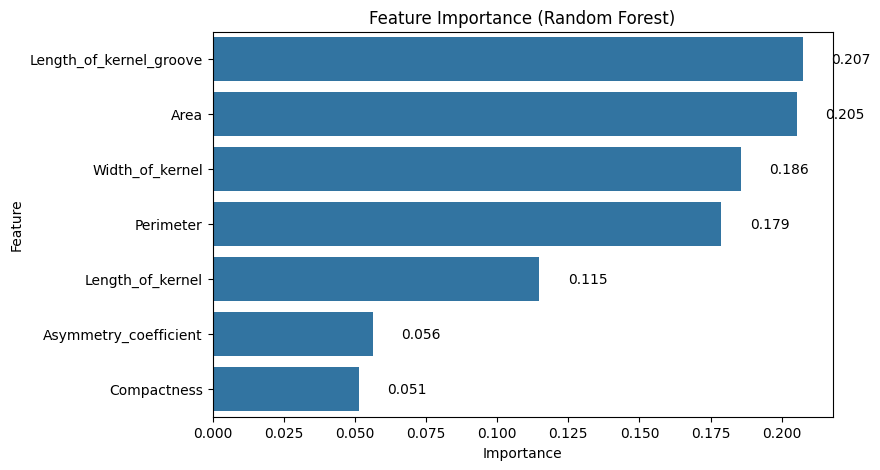

In [ ]:
rf_importance = rf_model.feature_importances_
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']
# รวมเป็น DataFrame
fi = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance})
fi = fi.sort_values(by='Importance', ascending=False)
print(fi)

# ====== Plot Bar Graph ======
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# แสดงค่าตัวเลขบนแท่ง
for i, v in enumerate(fi['Importance']):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')
plt.show()

Top 2 important features: ['Length_of_kernel_groove', 'Area']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 2 features): 0.9047619047619048


/tmp/ipython-input-754135899.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


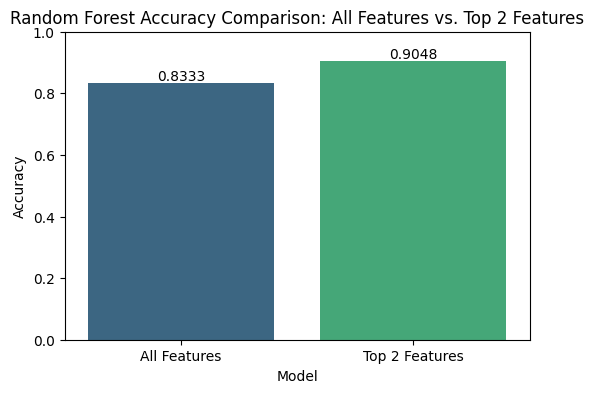

In [ ]:
# เอาเฉพาะ 2 feature แรกที่สำคัญสุด
top2_features = fi['Feature'].head(2).tolist()
print("Top 2 important features:", top2_features)

# Convert X_train and X_test to DataFrames to allow column selection by name
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)


# Train ใหม่ด้วยเฉพาะ feature เหล่านี้
model_top2 = RandomForestClassifier(random_state=42)
model_top2.fit(X_train_df[top2_features], y_train)

# ประเมิน accuracy
accuracy_all_features = rf_model.score(X_test, y_test)
accuracy_top2_features = model_top2.score(X_test_df[top2_features], y_test)

print("Accuracy (All features):", accuracy_all_features)
print("Accuracy (Top 2 features):", accuracy_top2_features)

# Plotting the comparison
accuracy_df = pd.DataFrame({
    'Model': ['All Features', 'Top 2 Features'],
    'Accuracy': [accuracy_all_features, accuracy_top2_features]
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Random Forest Accuracy Comparison: All Features vs. Top 2 Features')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')

# Add accuracy values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.show()

In [ ]:
rf_model2 = RandomForestClassifier(random_state=42, criterion = 'entropy')
rf_model2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

                   Feature  Importance
6  Length_of_kernel_groove    0.207465
0                     Area    0.205353
4          Width_of_kernel    0.185720
1                Perimeter    0.178792
3         Length_of_kernel    0.114882
5    Asymmetry_coefficient    0.056411
2              Compactness    0.051378


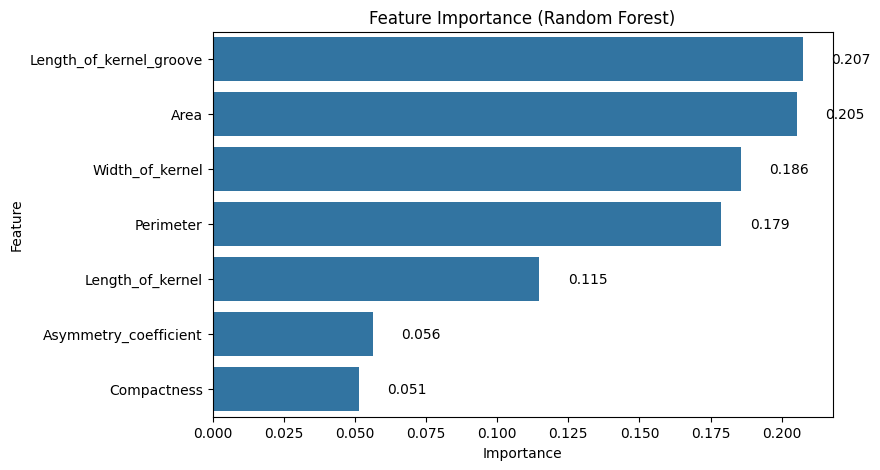

In [ ]:
rf_importance2 = rf_model2.feature_importances_
feature_names = ['Area','Perimeter','Compactness','Length_of_kernel',
                 'Width_of_kernel','Asymmetry_coefficient','Length_of_kernel_groove']
# รวมเป็น DataFrame
fi2 = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance})
fi2 = fi2.sort_values(by='Importance', ascending=False)
print(fi2)

# ====== Plot Bar Graph ======
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi2)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")

# แสดงค่าตัวเลขบนแท่ง
for i, v in enumerate(fi2['Importance']):
    plt.text(v + 0.01, i, f"{v:.3f}", color='black', va='center')
plt.show()

Top 2 important features: ['Length_of_kernel_groove', 'Area']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 2 features): 0.9047619047619048


/tmp/ipython-input-3536217247.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')


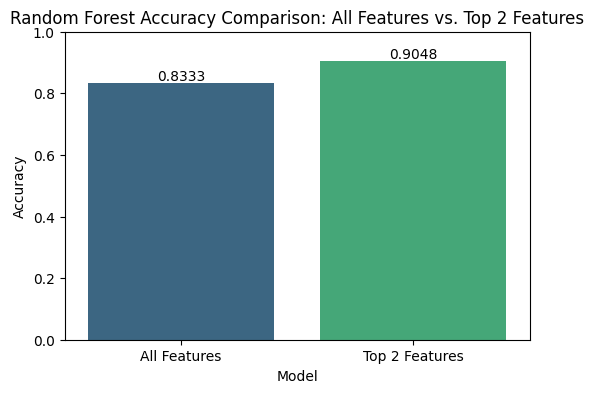

In [ ]:
# เอาเฉพาะ 2 feature แรกที่สำคัญสุด
top2_features2 = fi2['Feature'].head(2).tolist()
print("Top 2 important features:", top2_features2)

# Convert X_train and X_test to DataFrames to allow column selection by name
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)


# Train ใหม่ด้วยเฉพาะ feature เหล่านี้
model2top2 = RandomForestClassifier(random_state=42)
model2top2.fit(X_train_df[top2_features2], y_train)

# ประเมิน accuracy
accuracy_all_features = rf_model2.score(X_test, y_test)
accuracy_top2_features = model2top2.score(X_test_df[top2_features2], y_test)

print("Accuracy (All features):", accuracy_all_features)
print("Accuracy (Top 2 features):", accuracy_top2_features)

# Plotting the comparison
accuracy_df = pd.DataFrame({
    'Model': ['All Features', 'Top 2 Features'],
    'Accuracy': [accuracy_all_features, accuracy_top2_features]
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Random Forest Accuracy Comparison: All Features vs. Top 2 Features')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')

# Add accuracy values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.show()

In [ ]:
for i in range(1,5):
  topi_feature = fi2['Feature'].head(i).tolist()
  print("Top 2 important features:", topi_feature)

  # Convert X_train and X_test to DataFrames to allow column selection by name
  X_train_dfs = pd.DataFrame(X_train, columns=feature_names)
  X_test_dfs = pd.DataFrame(X_test, columns=feature_names)


  # Train ใหม่ด้วยเฉพาะ feature เหล่านี้
  model2topi = RandomForestClassifier(random_state=42)
  model2topi.fit(X_train_dfs[topi_feature], y_train)

  # ประเมิน accuracy
  accuracy_all_features = rf_model2.score(X_test, y_test)
  accuracy_topi_features = model2topi.score(X_test_dfs[topi_feature], y_test)

  print("Accuracy (All features):", accuracy_all_features)
  print(f"Accuracy (Top {i} features):", accuracy_topi_features)

Top 2 important features: ['Length_of_kernel_groove']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 1 features): 0.7380952380952381
Top 2 important features: ['Length_of_kernel_groove', 'Area']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 2 features): 0.9047619047619048
Top 2 important features: ['Length_of_kernel_groove', 'Area', 'Width_of_kernel']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 3 features): 0.8095238095238095
Top 2 important features: ['Length_of_kernel_groove', 'Area', 'Width_of_kernel', 'Perimeter']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 4 features): 0.8333333333333334


In [ ]:
for i in range(1,6):
  topi_feature = fi2['Feature'].head(i).tolist()
  print("Top 2 important features:", topi_feature)

  # Convert X_train and X_test to DataFrames to allow column selection by name
  X_train_dfs = pd.DataFrame(X_train, columns=feature_names)
  X_test_dfs = pd.DataFrame(X_test, columns=feature_names)


  # Train ใหม่ด้วยเฉพาะ feature เหล่านี้
  modelrtopi = RandomForestClassifier()
  modelrtopi.fit(X_train_dfs[topi_feature], y_train)

  # ประเมิน accuracy
  accuracy_all_features = rf_model2.score(X_test, y_test)
  accuracy_topi_features = modelrtopi.score(X_test_dfs[topi_feature], y_test)

  print("Accuracy (All features):", accuracy_all_features)
  print(f"Accuracy (Top {i} features):", accuracy_topi_features)

Top 2 important features: ['Length_of_kernel_groove']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 1 features): 0.7142857142857143
Top 2 important features: ['Length_of_kernel_groove', 'Area']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 2 features): 0.8809523809523809
Top 2 important features: ['Length_of_kernel_groove', 'Area', 'Width_of_kernel']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 3 features): 0.8095238095238095
Top 2 important features: ['Length_of_kernel_groove', 'Area', 'Width_of_kernel', 'Perimeter']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 4 features): 0.8571428571428571
Top 2 important features: ['Length_of_kernel_groove', 'Area', 'Width_of_kernel', 'Perimeter', 'Length_of_kernel']
Accuracy (All features): 0.8333333333333334
Accuracy (Top 5 features): 0.8333333333333334
